## Data

In [1]:
import pandas as pd

df = pd.read_csv("data/train.csv")
df.head()

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,749.00
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Intel HD Graphics 505,Windows 10,2kg,449.00
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.2kg,1460.00
3,578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,2868.99
4,42,1241,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.26kg,1713.37


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 99.9+ KB


## Data exploration

In [3]:
df["Company"].value_counts()

Company
Lenovo       208
Dell         207
HP           189
Asus         108
Acer          75
Toshiba       37
MSI           34
Apple         17
Mediacom       7
Razer          6
Samsung        6
Fujitsu        3
Microsoft      3
Vero           3
Xiaomi         3
Google         2
Chuwi          2
LG             1
Huawei         1
Name: count, dtype: int64

In [4]:
df["Weight"].value_counts()

Weight
2.2kg     86
2.1kg     40
2.3kg     35
2.4kg     31
2kg       30
          ..
4.0kg      1
0.98kg     1
3.6kg      1
2.99kg     1
1.79kg     1
Name: count, Length: 158, dtype: int64

## Data processing

In [5]:
from sklearn.preprocessing import LabelEncoder

company_enc = LabelEncoder()
df["Company_num"] = company_enc.fit_transform(df["Company"])

In [6]:
df["Weight"] = df["Weight"].str.replace("kg","").astype(float)
df["Ram"] = df["Ram"].str.replace("GB","").astype(float)
df['ScreenResolution'] = df['ScreenResolution'].str.extract(r'(\d{4})', expand=False).astype(float)

In [7]:
dict_opsys = {"Chrome OS":0,'Windows 10':1, 'Windows 7':2, 'Linux':3, 'No OS':4,'macOS':5,'Mac OS X':6,'Windows 10 S':7,'Android':8}
df["Typeopsys"] = df["OpSys"].replace(dict_opsys)

/tmp/ipykernel_105379/4056709198.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Typeopsys"] = df["OpSys"].replace(dict_opsys)


In [8]:
df['cpu_amd'] = df['Cpu'].str.contains('AMD').astype(int)
df['cpu_intel'] = df['Cpu'].str.contains('Intel').astype(int)
df['ssd_si'] = df['Memory'].str.contains('SSD').astype(int)
df['hdd_si'] = df['Memory'].str.contains('HDD').astype(int)
df['ssd_si_hdd_si'] = df['Memory'].str.contains('SSD').astype(int) & df['Memory'].str.contains('HDD').astype(int)
df['flash_mem'] = df['Memory'].str.contains('Flash').astype(int)
df['hybrid_mem'] = df['Memory'].str.contains('Hybrid').astype(int)
df['Es_gpuintegrada'] = df['Gpu'].str.contains('Intel').astype(int)
df['Es_amd'] = df['Gpu'].str.contains('AMD').astype(int)
df['Es_Nvidia'] = df['Gpu'].str.contains('Nvidia').astype(int)

In [9]:
df

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,...,cpu_amd,cpu_intel,ssd_si,hdd_si,ssd_si_hdd_si,flash_mem,hybrid_mem,Es_gpuintegrada,Es_amd,Es_Nvidia
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,1366.0,Intel Core i7 7500U 2.7GHz,8.0,1TB HDD,...,0,1,0,1,0,0,0,0,1,0
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366.0,Intel Pentium Quad Core N4200 1.1GHz,4.0,1TB HDD,...,0,1,0,1,0,0,0,1,0,0
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,1920.0,Intel Core i5 6200U 2.3GHz,8.0,256GB SSD,...,0,1,1,0,0,0,0,1,0,0
3,578,767,Dell,Alienware 17,Gaming,15.6,3840.0,Intel Core i7 7700HQ 2.8GHz,16.0,256GB SSD + 1TB HDD,...,0,1,1,1,1,0,0,0,0,1
4,42,1241,Dell,Latitude E7270,Ultrabook,12.5,1920.0,Intel Core i5 6300U 2.4GHz,8.0,256GB SSD,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,89,973,Acer,Chromebook C738T-C2EJ,2 in 1 Convertible,11.6,1366.0,Intel Celeron Dual Core N3060 1.6GHz,4.0,32GB Flash Storage,...,0,1,0,0,0,1,0,1,0,0
908,716,1018,Toshiba,Portege Z30-C-16H,Notebook,13.3,1920.0,Intel Core i5 6200U 2.3GHz,4.0,128GB SSD,...,0,1,1,0,0,0,0,1,0,0
909,517,1071,Acer,Aspire ES1-523,Notebook,15.6,1366.0,AMD A8-Series 7410 2.2GHz,8.0,1TB HDD,...,1,0,0,1,0,0,0,0,1,0
910,891,965,Dell,Latitude 7480,Ultrabook,14.0,1920.0,Intel Core i7 7600U 2.8GHz,8.0,256GB SSD,...,0,1,1,0,0,0,0,1,0,0


In [10]:
df.dtypes

id                    int64
laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution    float64
Cpu                  object
Ram                 float64
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price_euros         float64
Company_num           int64
Typeopsys             int64
cpu_amd               int64
cpu_intel             int64
ssd_si                int64
hdd_si                int64
ssd_si_hdd_si         int64
flash_mem             int64
hybrid_mem            int64
Es_gpuintegrada       int64
Es_amd                int64
Es_Nvidia             int64
dtype: object

In [11]:
df.select_dtypes(include='number')

,id,laptop_ID,Inches,ScreenResolution,Ram,Weight,Price_euros,Company_num,Typeopsys,cpu_amd,cpu_intel,ssd_si,hdd_si,ssd_si_hdd_si,flash_mem,hybrid_mem,Es_gpuintegrada,Es_amd,Es_Nvidia
0,268,1002,15.6,1366.0,8.0,2.36,749.00,4,1,0,1,0,1,0,0,0,0,1,0
1,347,867,15.6,1366.0,4.0,2.00,449.00,2,1,0,1,0,1,0,0,0,1,0,0
2,353,966,13.3,1920.0,8.0,1.20,1460.00,16,2,0,1,1,0,0,0,0,1,0,0
3,578,767,15.6,3840.0,16.0,4.42,2868.99,4,1,0,1,1,1,1,0,0,0,0,1
4,42,1241,12.5,1920.0,8.0,1.26,1713.37,4,2,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,89,973,11.6,1366.0,4.0,1.25,389.00,0,0,0,1,0,0,0,1,0,1,0,0
908,716,1018,13.3,1920.0,4.0,1.20,1195.00,16,1,0,1,1,0,0,0,0,1,0,0
909,517,1071,15.6,1366.0,8.0,2.40,449.00,0,1,1,0,0,1,0,0,0,0,1,0
910,891,965,14.0,1920.0,8.0,1.36,1775.00,4,1,0,1,1,0,0,0,0,1,0,0


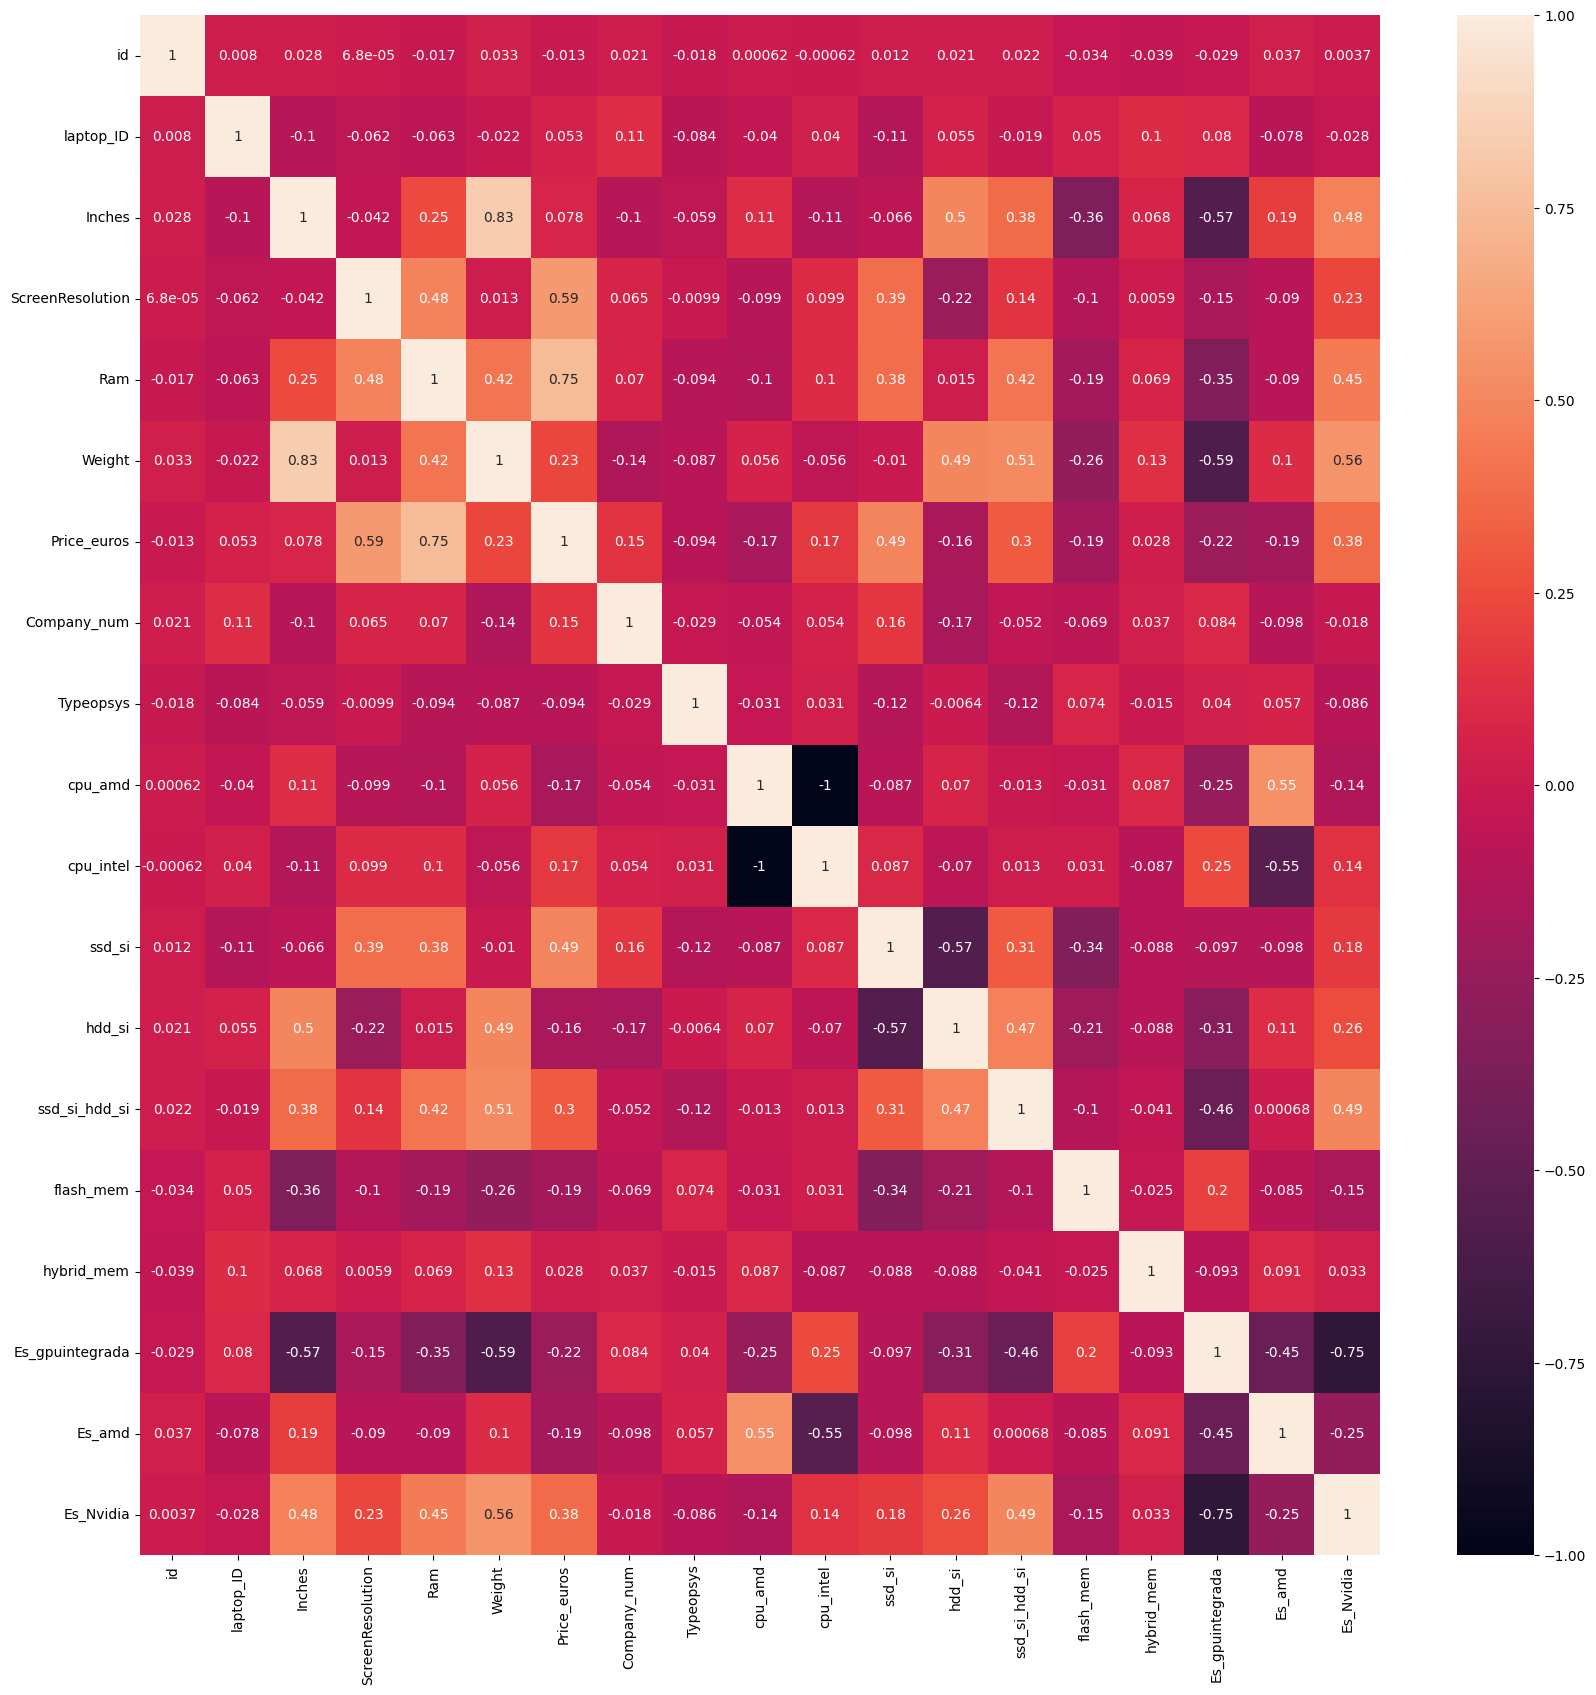

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(20,20))
sns.heatmap(numeric_df.corr(),annot=True);

### 1. Definir X e y

In [13]:
X = numeric_df.drop(['id','laptop_ID','Price_euros'],axis=1)
y= numeric_df["Price_euros"]

In [14]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.20,random_state=5)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(729, 16)
(183, 16)
(729,)
(183,)


In [15]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = lm.predict(X_test)

In [17]:
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error

r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE)", mae)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE)",mape)
rmse = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error (RMSE)",rmse)

Coeficiente de determinación 0.6239611729321217
Mean Absolute Error (MAE) 302.5073566903935
Mean Absolute Percentage Error (MAPE) 0.36738748683441774
Root Mean Squared Error (RMSE) 424.44010545638184


In [18]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE)", mae)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE)",mape)
rmse = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error (RMSE)",rmse)

Coeficiente de determinación 0.5745965401653258
Mean Absolute Error (MAE) 265.24174863387975
Mean Absolute Percentage Error (MAPE) 0.2652876128913198
Root Mean Squared Error (RMSE) 451.4405620291259


In [19]:
from xgboost import XGBRegressor

xgbr = XGBRegressor(random_state=0)
xgbr.fit(X_train, y_train)

y_pred = xgbr.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE)", mae)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE)",mape)
rmse = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error (RMSE)",rmse)

Coeficiente de determinación 0.7594998133662106
Mean Absolute Error (MAE) 231.31788037242782
Mean Absolute Percentage Error (MAPE) 0.25190419752794424
Root Mean Squared Error (RMSE) 339.43590386226157


# Test

In [21]:
df = pd.read_csv("data/test.csv")

df["Company_num"] = company_enc.fit_transform(df["Company"])
df["Weight"] = df["Weight"].str.replace("kg","").astype(float)
df["Ram"] = df["Ram"].str.replace("GB","").astype(float)
df['ScreenResolution'] = df['ScreenResolution'].str.extract(r'(\d{4})', expand=False).astype(float)
df["Typeopsys"] = df["OpSys"].replace(dict_opsys)
df['cpu_amd'] = df['Cpu'].str.contains('AMD').astype(int)
df['cpu_intel'] = df['Cpu'].str.contains('Intel').astype(int)
df['ssd_si'] = df['Memory'].str.contains('SSD').astype(int)
df['hdd_si'] = df['Memory'].str.contains('HDD').astype(int)
df['ssd_si_hdd_si'] = df['Memory'].str.contains('SSD').astype(int) & df['Memory'].str.contains('HDD').astype(int)
df['flash_mem'] = df['Memory'].str.contains('Flash').astype(int)
df['hybrid_mem'] = df['Memory'].str.contains('Hybrid').astype(int)
df['Es_gpuintegrada'] = df['Gpu'].str.contains('Intel').astype(int)
df['Es_amd'] = df['Gpu'].str.contains('AMD').astype(int)
df['Es_Nvidia'] = df['Gpu'].str.contains('Nvidia').astype(int)
df

/tmp/ipykernel_105379/2782374545.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Typeopsys"] = df["OpSys"].replace(dict_opsys)


,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,...,cpu_amd,cpu_intel,ssd_si,hdd_si,ssd_si_hdd_si,flash_mem,hybrid_mem,Es_gpuintegrada,Es_amd,Es_Nvidia
0,181,1098,HP,Spectre x360,Ultrabook,13.3,3840.0,Intel Core i7 7500U 2.7GHz,16.0,512GB SSD,...,0,1,1,0,0,0,0,1,0,0
1,708,330,Acer,Aspire 5,Notebook,15.6,1366.0,AMD A12-Series 9720P 2.7GHz,8.0,256GB SSD,...,1,0,1,0,0,0,0,0,1,0
2,862,1260,Acer,Aspire ES1-572,Notebook,15.6,1366.0,Intel Core i3 6006U 2.0GHz,4.0,500GB HDD,...,0,1,0,1,0,0,0,1,0,0
3,1064,1137,HP,EliteBook 1040,Notebook,14.0,1920.0,Intel Core i5 6200U 2.3GHz,8.0,256GB SSD,...,0,1,1,0,0,0,0,1,0,0
4,702,1015,HP,ENVY -,Notebook,13.3,1920.0,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,1281,145,Lenovo,Legion Y520-15IKBN,Gaming,15.6,1920.0,Intel Core i7 7700HQ 2.8GHz,8.0,256GB SSD,...,0,1,1,0,0,0,0,0,0,1
387,524,1195,Lenovo,IdeaPad Y700-15ISK,Gaming,15.6,1920.0,Intel Core i7 6700HQ 2.6GHz,16.0,512GB SSD,...,0,1,1,0,0,0,0,0,0,1
388,1015,1070,HP,250 G5,Notebook,15.6,1366.0,Intel Core i5 7200U 2.5GHz,4.0,500GB HDD,...,0,1,0,1,0,0,0,1,0,0
389,1236,104,HP,15-bw000nv (E2-9000e/4GB/500GB/Radeon,Notebook,15.6,1920.0,AMD E-Series E2-9000e 1.5GHz,4.0,500GB HDD,...,1,0,0,1,0,0,0,0,1,0


In [23]:
numeric_df = df.select_dtypes(include='number')
X_test = numeric_df.drop(['id','laptop_ID'],axis=1)

y_pred = xgbr.predict(X_test)

In [26]:
submission = pd.DataFrame({"id": numeric_df["id"], "Price_euros": y_pred})
submission

,id,Price_euros
0,181,1301.390625
1,708,488.554138
2,862,301.440918
3,1064,1545.928833
4,702,1402.288574
...,...,...
386,1281,775.635559
387,524,2823.925781
388,1015,397.788513
389,1236,417.182434


In [28]:
submission.to_csv("submission_iraitz.csv", index=False)